In [2]:
path = "/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2019/CR3000/Sec/*.dat"

In [3]:
column_names = ['TIMESTAMP',
                'GHIP_SI02pt100',
                'GHIP_SMP11',
                'GHIP_SMP22',
                'GHIP_SPN1',
                'GHIT_SMP22',
                'TGHIP_SI02pt100', 
                'TGHIP_SI02pt100_dirty',
                'TGIP_SMP11_VENT',
                'DfHIP_SPN1', 
                'DfHIRP_SMP11',
                'DfHIT_SMP22',
                'DIF_GLO_REF_SPN1',
                'DNI_SHP1',
                'LW_SGR4', 
                'wind_speed', 
                'wind_direction']

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import datetime
import pytz
import pvlib

In [5]:
GHI =  ['GHIP_SI02pt100',
        'GHIP_SMP11',
        'GHIP_SMP22',
        'GHIP_SPN1',
        'GHIT_SMP22']

GTI = ['TGHIP_SI02pt100', 
       'TGHIP_SI02pt100_dirty',
       'TGIP_SMP11_VENT']

In [7]:
compdata = pd.DataFrame(columns = column_names)


In [8]:
datafiles = glob.glob(path)
datafiles.sort()

In [9]:
datafiles

['/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2019/CR3000/Sec/SAPIENS_CR3000_Second_01.dat',
 '/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2019/CR3000/Sec/SAPIENS_CR3000_Second_02.dat',
 '/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2019/CR3000/Sec/SAPIENS_CR3000_Second_03.dat',
 '/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2019/CR3000/Sec/SAPIENS_CR3000_Second_04.dat',
 '/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2019/CR3000/Sec/SAPIENS_CR3000_Second_05.dat',
 '/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2019/CR3000/Sec/SAPIENS_CR3000_Second_06.dat',
 '/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2019/CR3000/Sec/SAPIENS_CR3000_Second_07.dat',
 '/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2019/CR3000/Sec/SAPIENS_CR3000_Second_08.dat',
 '/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2019/CR3000/Sec/SAPIENS_CR3000_Second_09.dat',
 '/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2019/CR3000/Sec/SAPIENS_CR3000_Second

In [10]:
for file in datafiles:
        df = pd.read_csv(file, usecols=column_names)[column_names]        

        df[['GHIP_SI02pt100','GHIP_SMP11','GHIP_SMP22','GHIP_SPN1','GHIT_SMP22',
            'TGHIP_SI02pt100','TGHIP_SI02pt100_dirty','TGIP_SMP11_VENT',
            'DfHIP_SPN1','DfHIRP_SMP11','DfHIT_SMP22','DIF_GLO_REF_SPN1',
            'DNI_SHP1','LW_SGR4', 'wind_speed','wind_direction']] = df[['GHIP_SI02pt100',
            'GHIP_SMP11','GHIP_SMP22','GHIP_SPN1','GHIT_SMP22','TGHIP_SI02pt100',
            'TGHIP_SI02pt100_dirty','TGIP_SMP11_VENT','DfHIP_SPN1','DfHIRP_SMP11',
            'DfHIT_SMP22','DIF_GLO_REF_SPN1','DNI_SHP1','LW_SGR4', 'wind_speed',
            'wind_direction']].astype("float64")  
        df['TIMESTAMP'] = df['TIMESTAMP'].astype(np.datetime64)
                 
        df = df.fillna(-9999)
        df = df.sort_values(by=['TIMESTAMP'])
        df= df.drop_duplicates()
        compdata = pd.concat([compdata, df])

/Users/nataly/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (8,17,18,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/nataly/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (10,19,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [12]:
print(compdata.shape)
compdata = compdata.sort_values(by=['TIMESTAMP'])
compdata = compdata.drop_duplicates()
compdata = compdata.reset_index(drop=True)
print(compdata.shape)
dataserie = compdata.set_index('TIMESTAMP')
GHIdata = dataserie[GHI]  
GTIdata = dataserie[GTI]  


(29760173, 17)
(29760173, 17)


In [18]:
DIF = ['DfHIP_SPN1', 
       'DfHIRP_SMP11',
       'DfHIT_SMP22',
       'DIF_GLO_REF_SPN1']

DNI = ['DNI_SHP1']
  
WIND = ['wind_speed', 
        'wind_direction']


DIFdata  = dataserie[DIF]  
DNIdata  = dataserie[DNI]
Winddata = dataserie[WIND] 

In [16]:
GTIdata

,TGHIP_SI02pt100,TGHIP_SI02pt100_dirty,TGIP_SMP11_VENT
TIMESTAMP,,,
2019-01-02 22:58:59,0.0,0.00,-1.7
2019-01-02 22:59:00,0.0,0.00,-1.7
2019-01-02 22:59:01,0.0,0.00,-1.7
2019-01-02 22:59:02,0.0,0.00,-1.7
2019-01-02 22:59:03,0.0,0.00,-1.7
...,...,...,...
2019-12-31 23:47:00,0.0,0.00,-2.4
2019-12-31 23:47:01,0.0,0.00,-2.4
2019-12-31 23:47:02,0.0,0.00,-2.4


In [19]:
month = 'Apr'

array([<AxesSubplot:xlabel='TIMESTAMP'>, <AxesSubplot:xlabel='TIMESTAMP'>,
       <AxesSubplot:xlabel='TIMESTAMP'>, <AxesSubplot:xlabel='TIMESTAMP'>,
       <AxesSubplot:xlabel='TIMESTAMP'>], dtype=object)

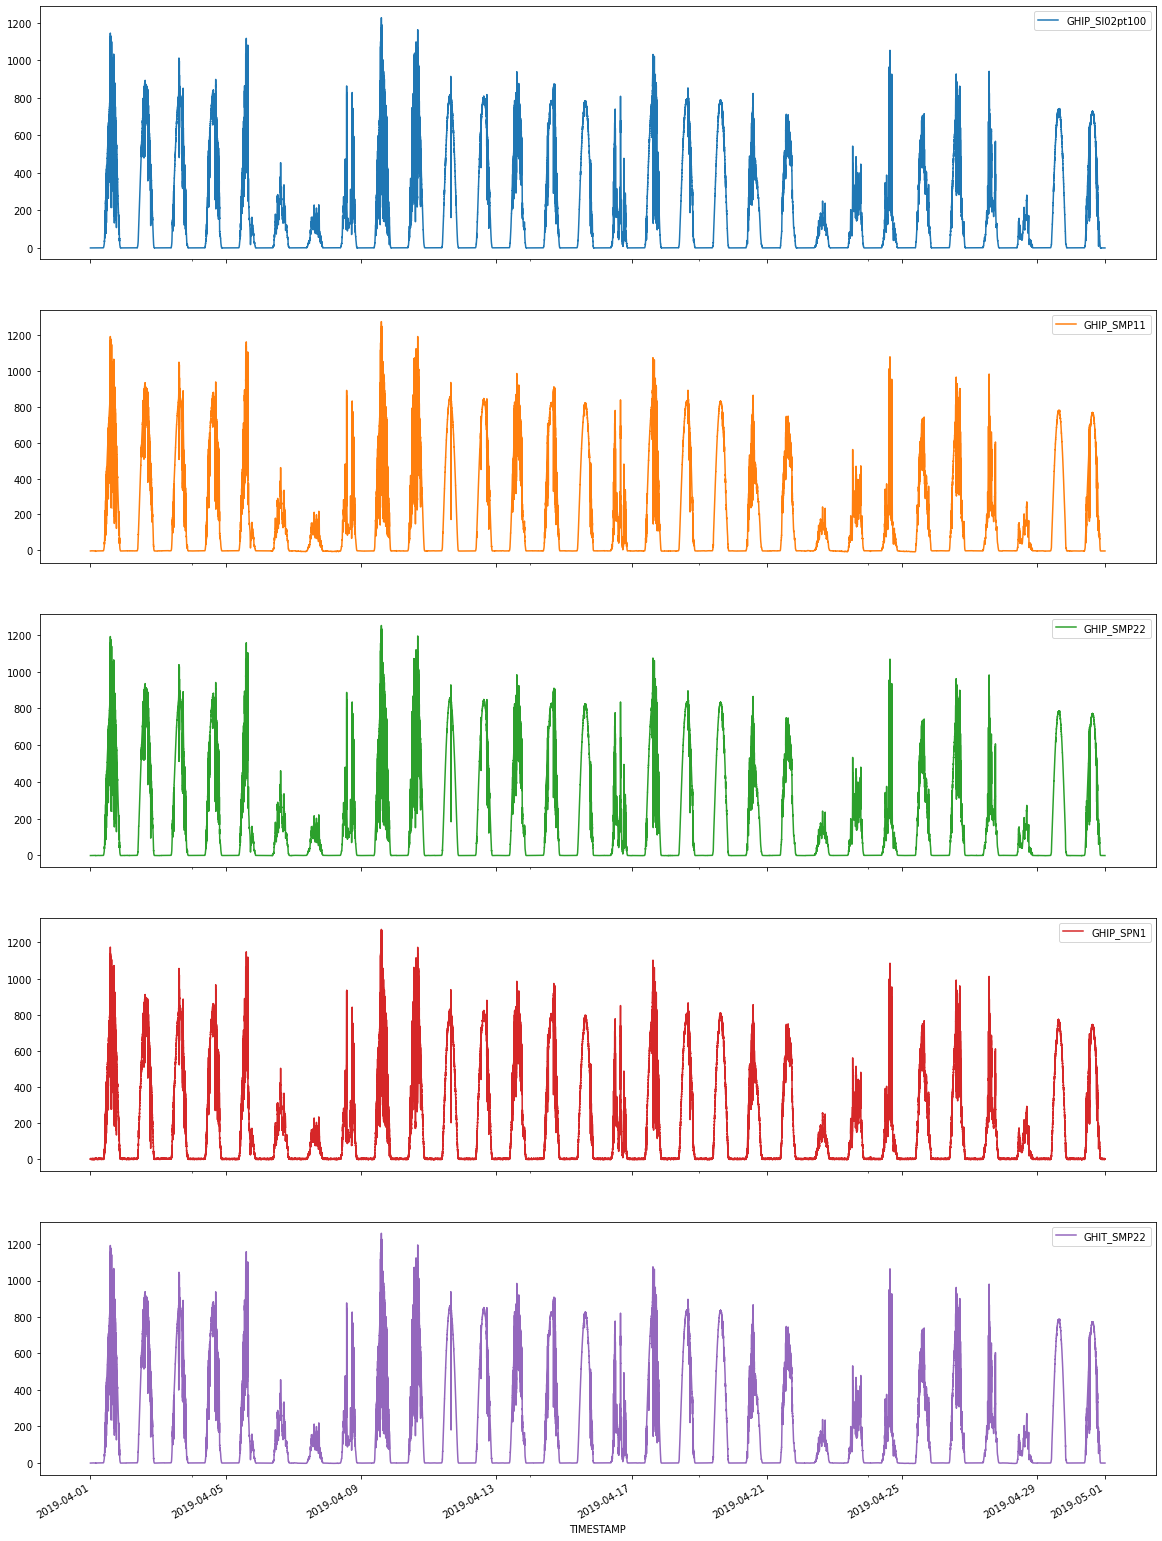

In [25]:
GHIdata.loc['2019-04'].plot(subplots=True, figsize=(20, 30))

In [26]:
Months = ['2019-01','2019-02','2019-03', '2019-04','2019-05','2019-06','2019-07','2019-08', '2019-09','2019-10','2019-11','2019-12']


Text(0, 0.5, 'W/m2')

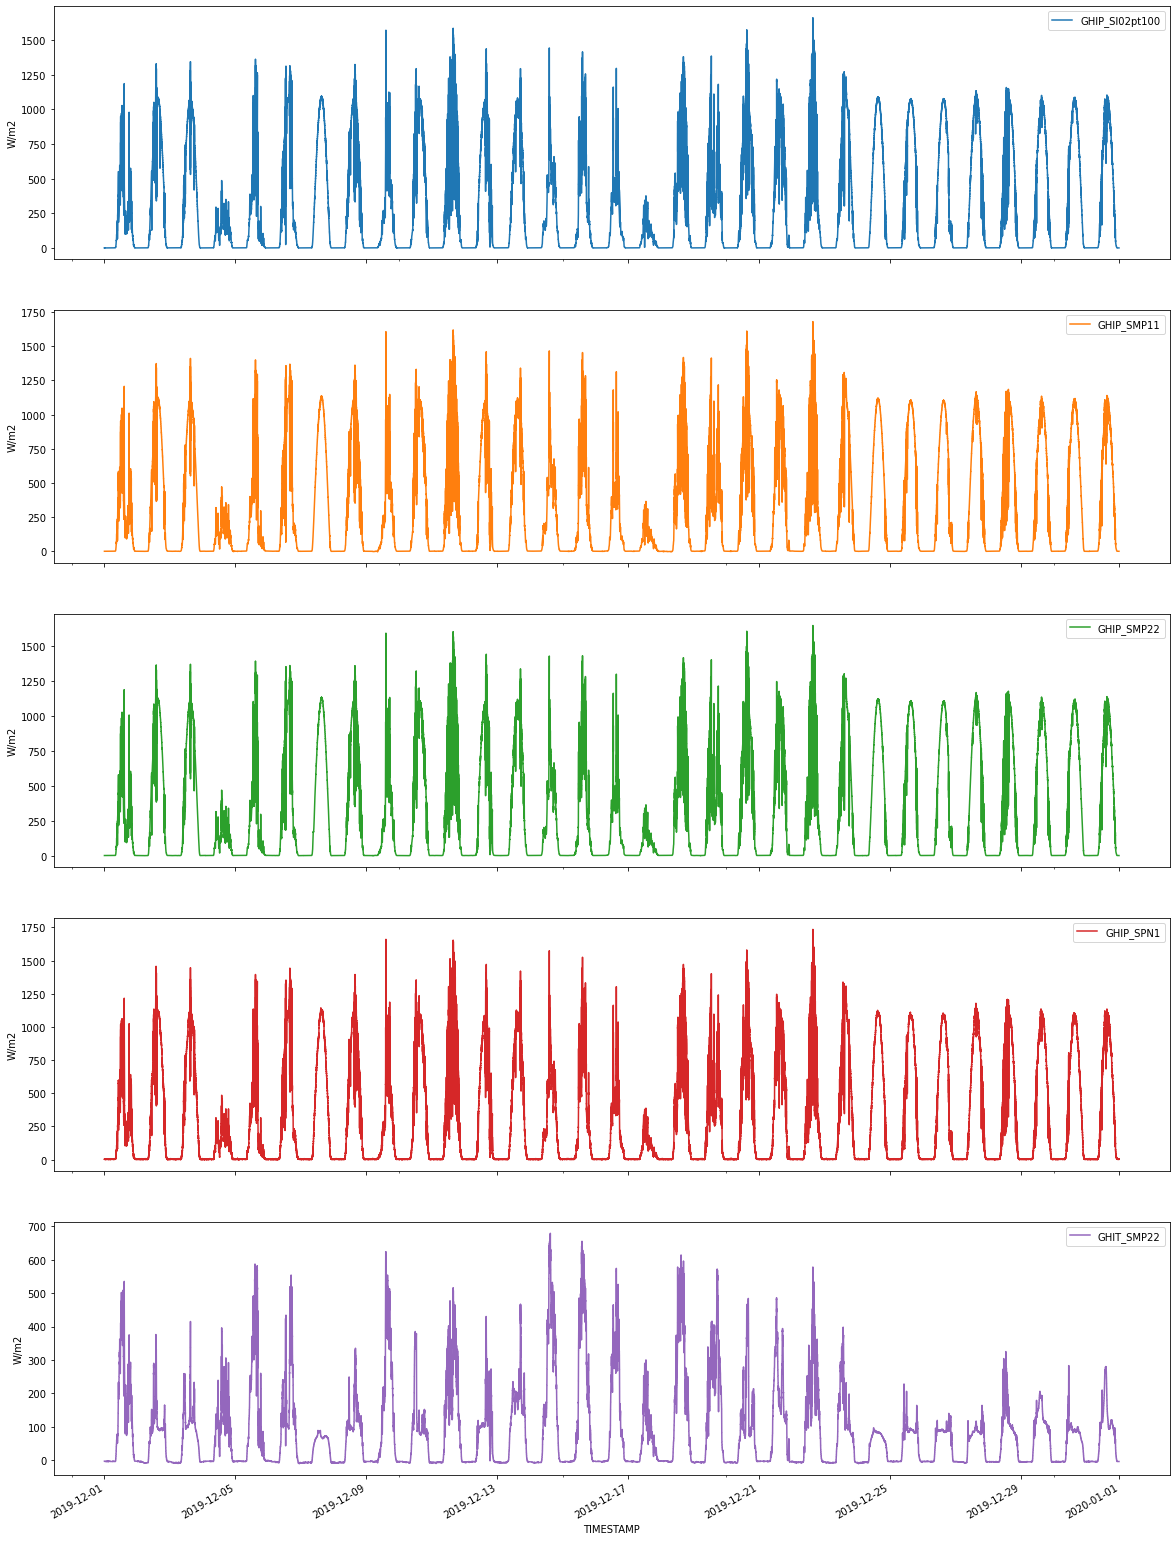

In [32]:
GHIplot = GHIdata.loc[Months[11]].plot(subplots=True, figsize=(20, 30))
GHIplot[0].set_ylabel('W/m2')
GHIplot[1].set_ylabel('W/m2')
GHIplot[2].set_ylabel('W/m2')
GHIplot[3].set_ylabel('W/m2')
GHIplot[4].set_ylabel('W/m2')


In [31]:
GHIplot[0].set_ylabel('W/m2')

Text(3.1999999999999886, 0.5, 'W/m2')

In [42]:
import matplotlib.pyplot as plt


In [ ]:
    GTIplot = GTIdata.loc[month,].plot(subplots=True, figsize=(20, 30))

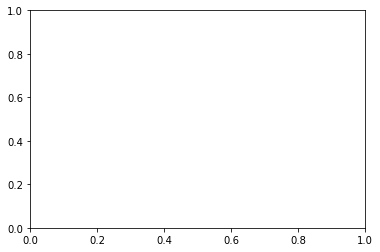

In [53]:
fig, ax = plt.subplots()


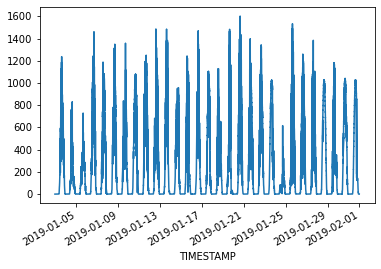

In [55]:

GTIplot = GTIdata.TGHIP_SI02pt100.loc[month].plot()


In [57]:
fig = GTIplot.get_figure()

In [58]:
fig.savefig('teste.jpeg')

In [49]:
figname

'GTI 2019-01'

In [50]:
    GTIplot.savefig(figname.jpeg)

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

In [54]:
GTIplot.dtypes

AttributeError: 'AxesSubplot' object has no attribute 'dtypes'

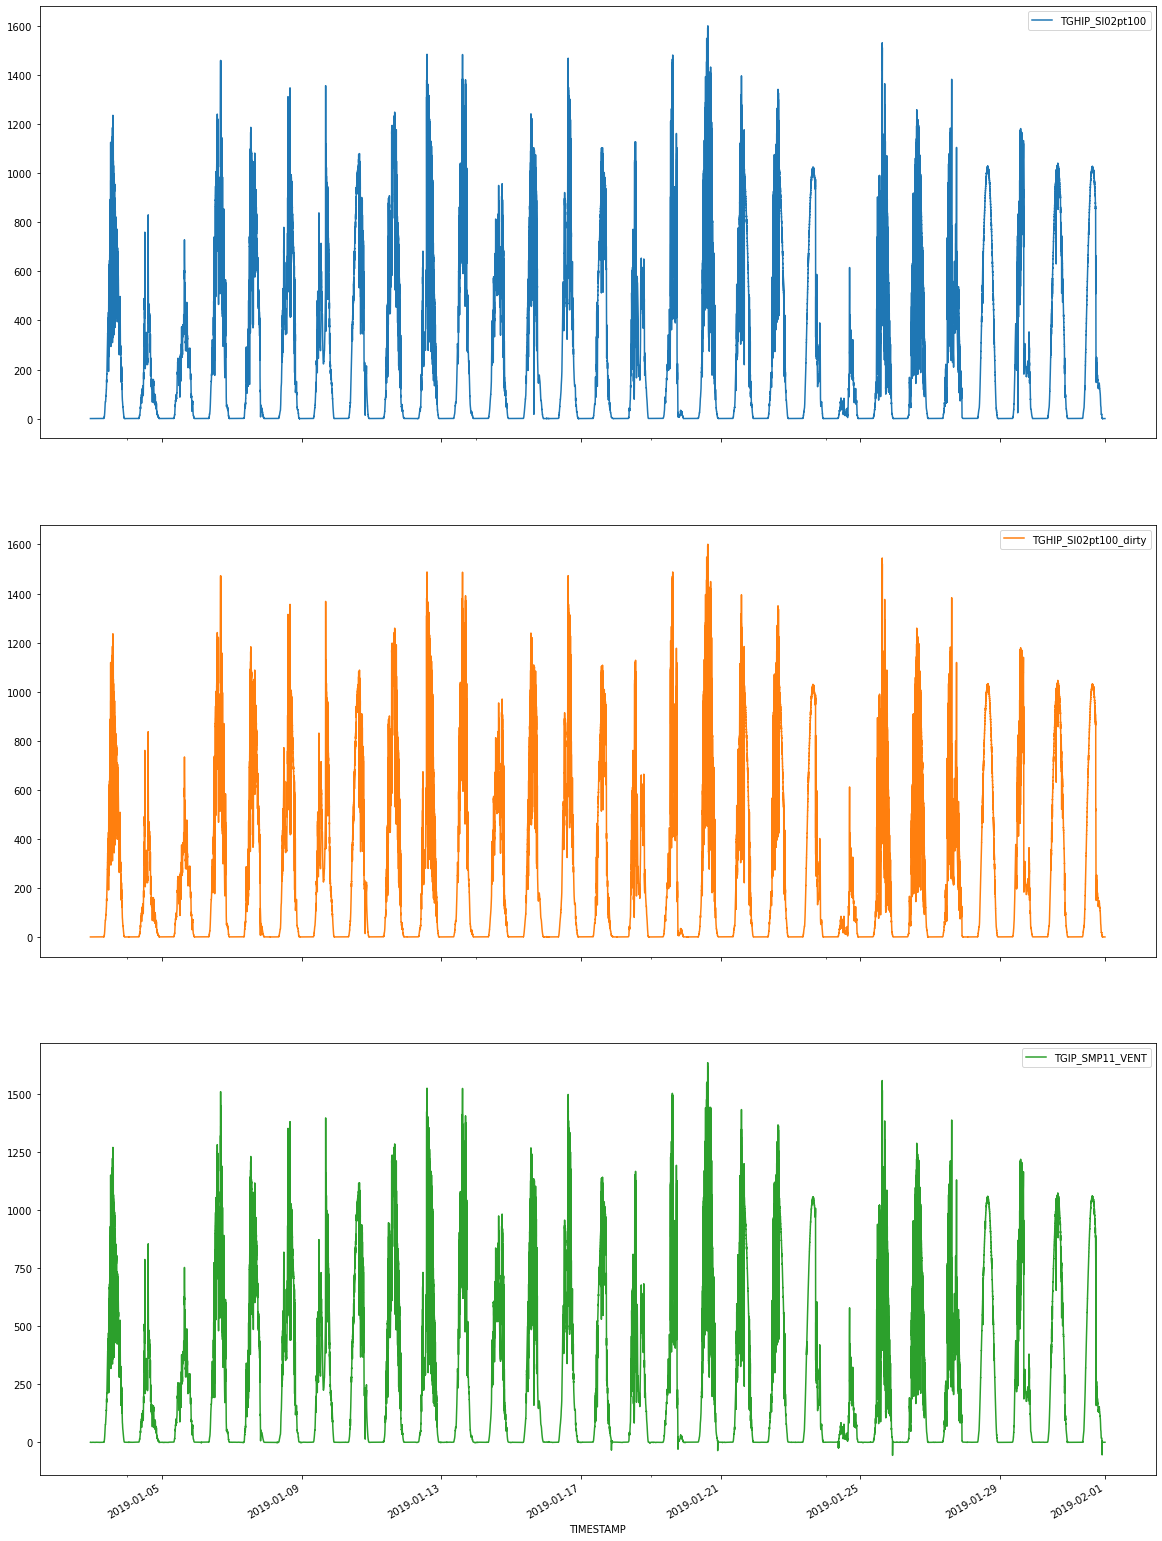

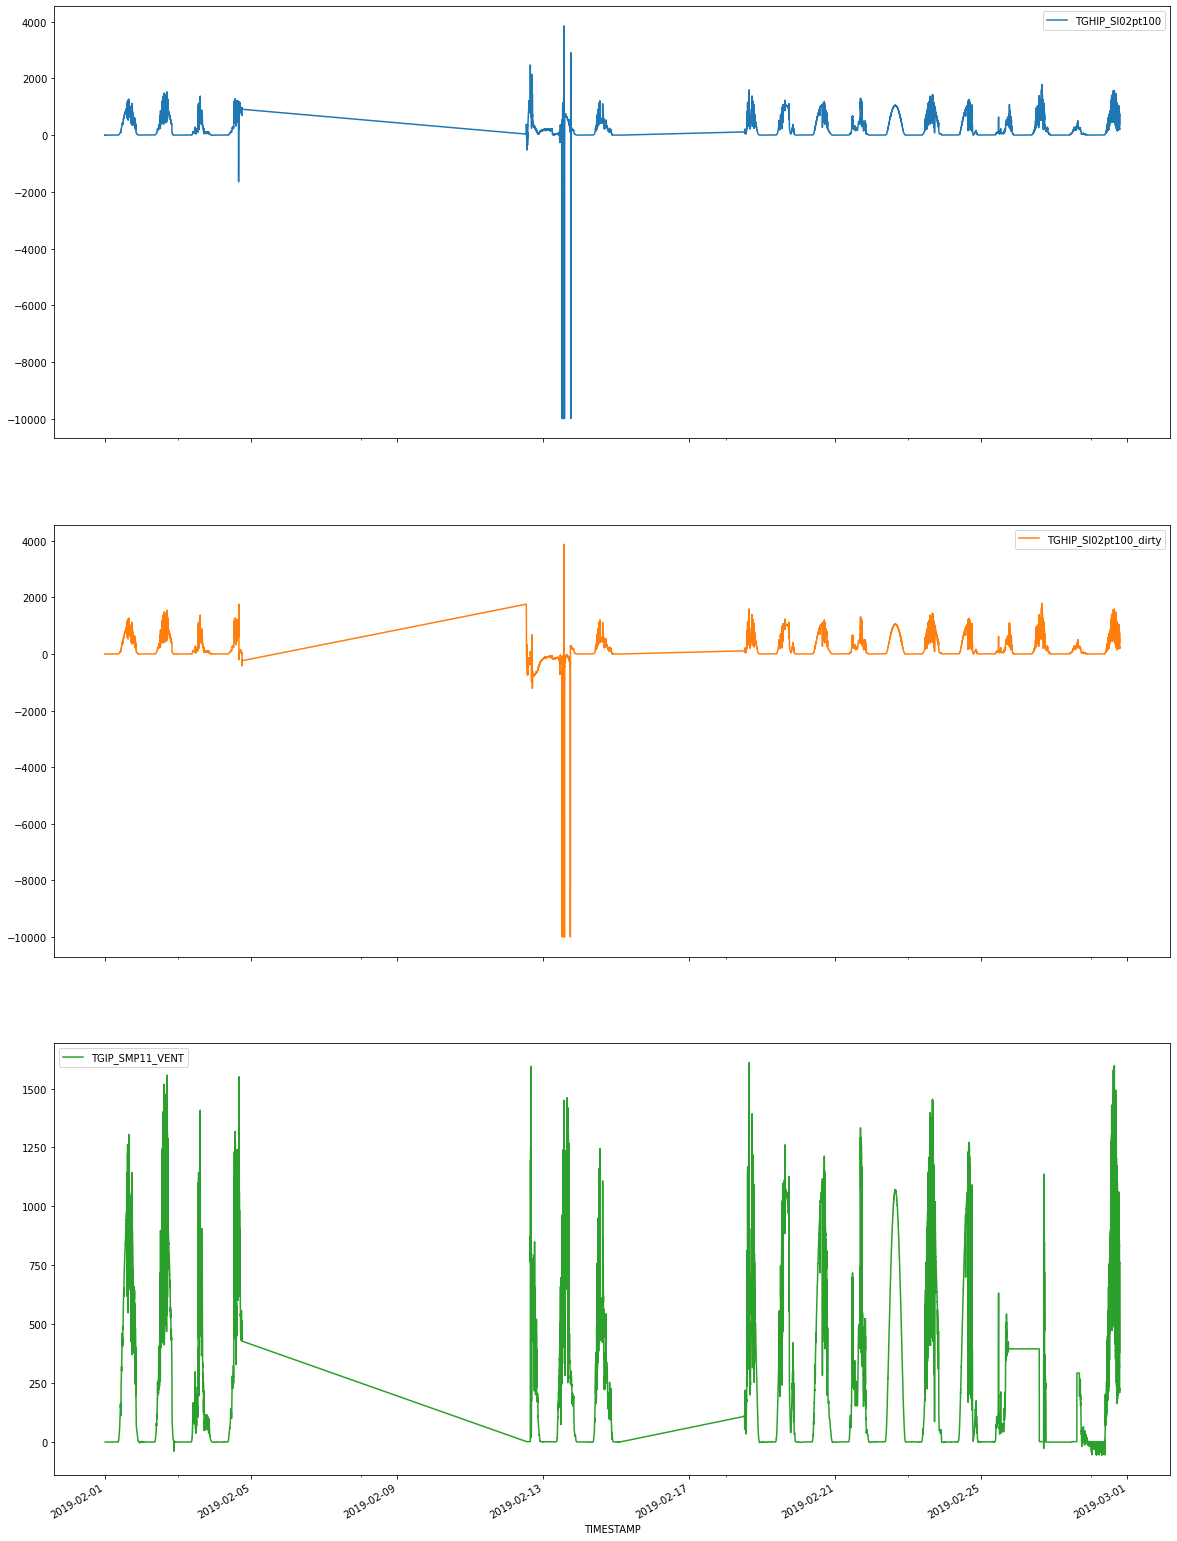

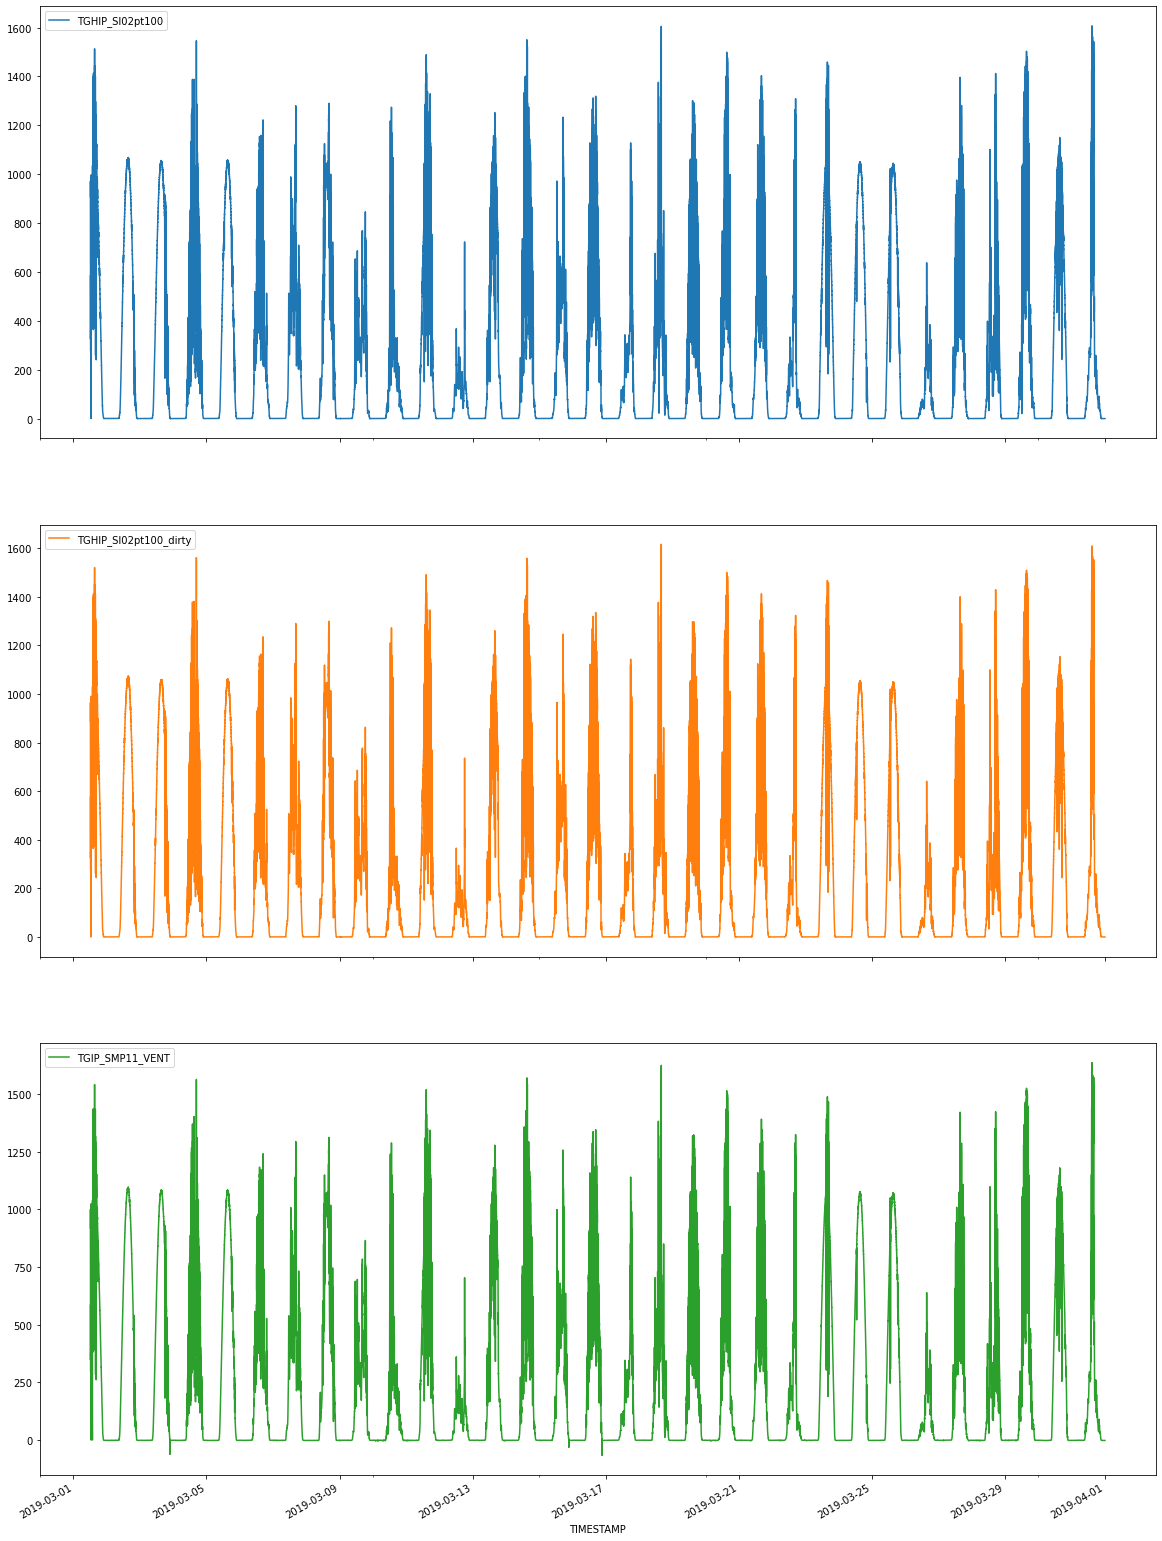

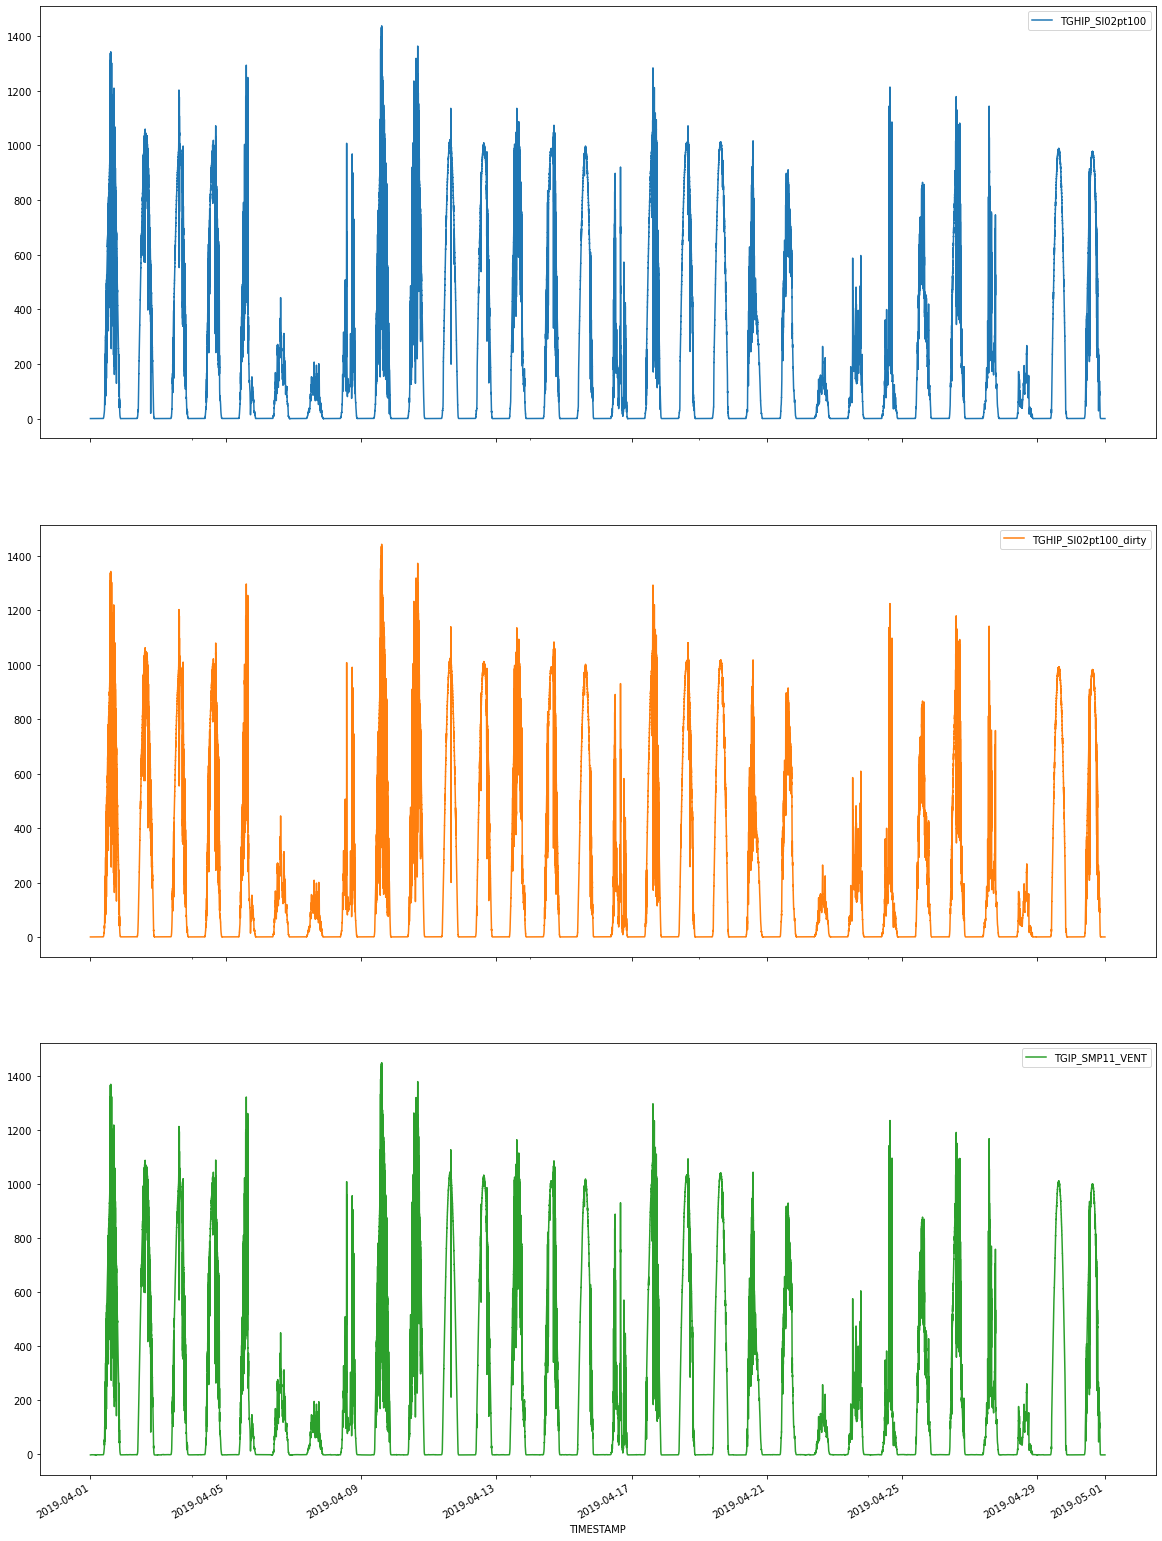

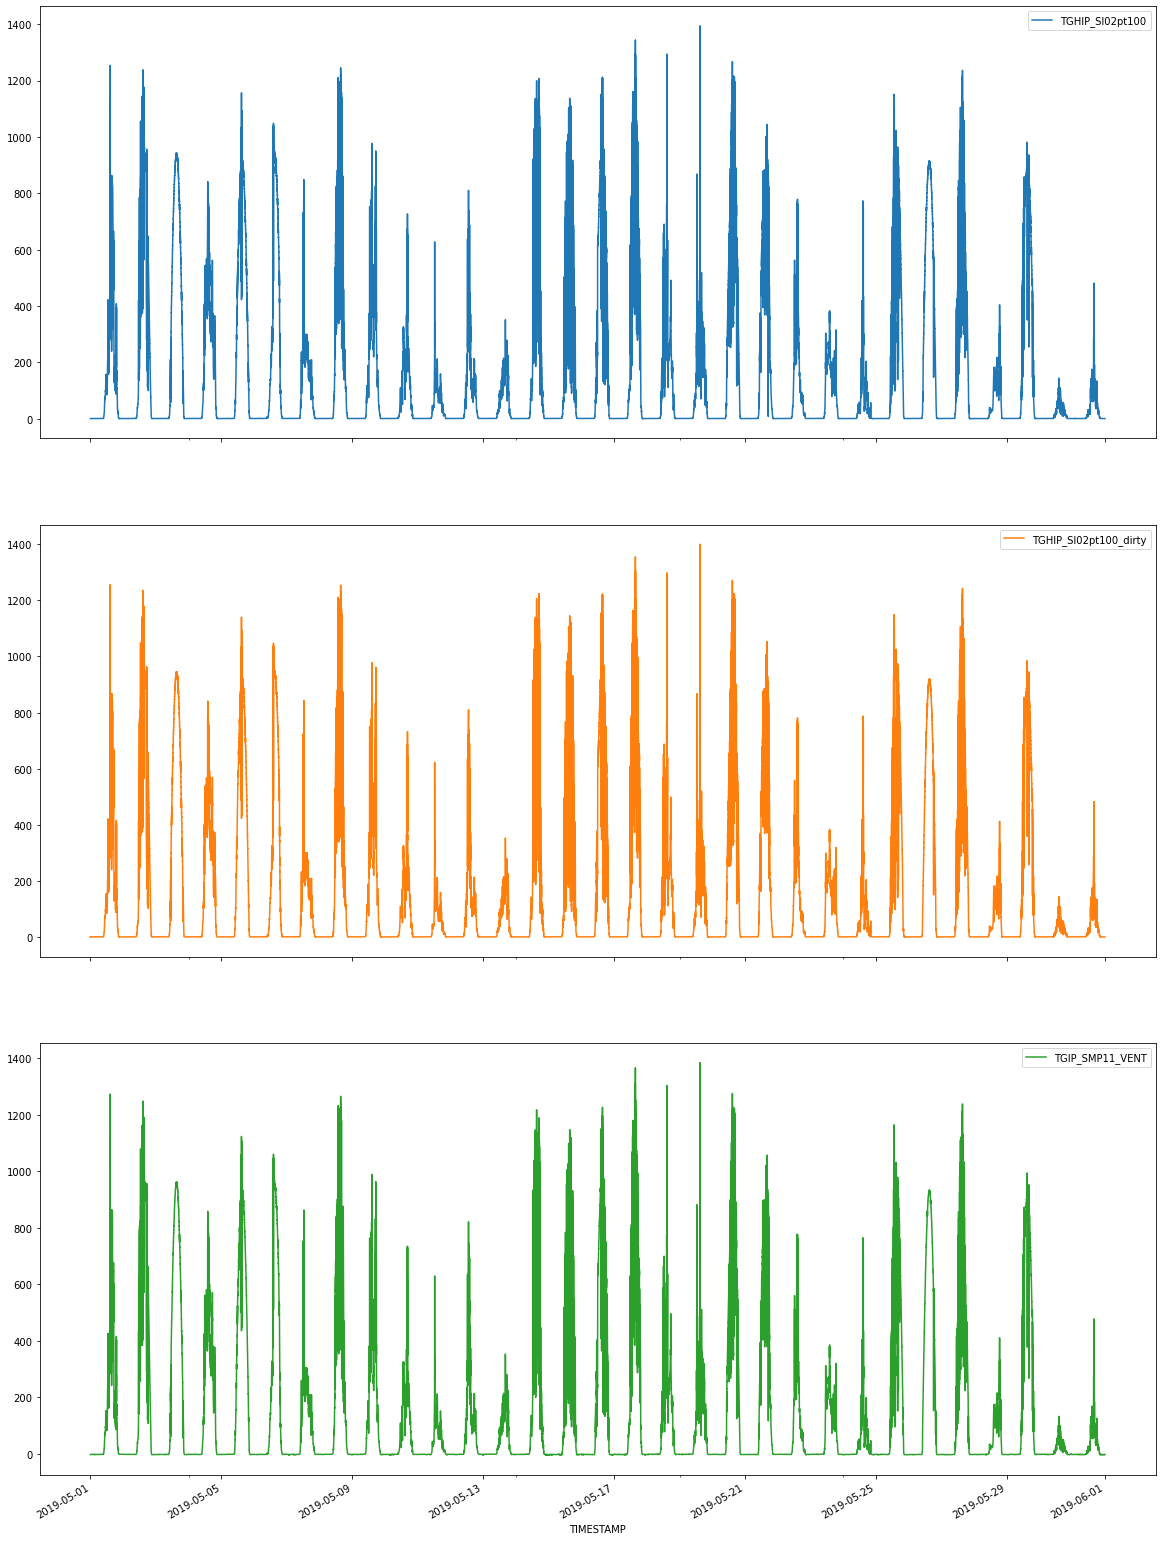

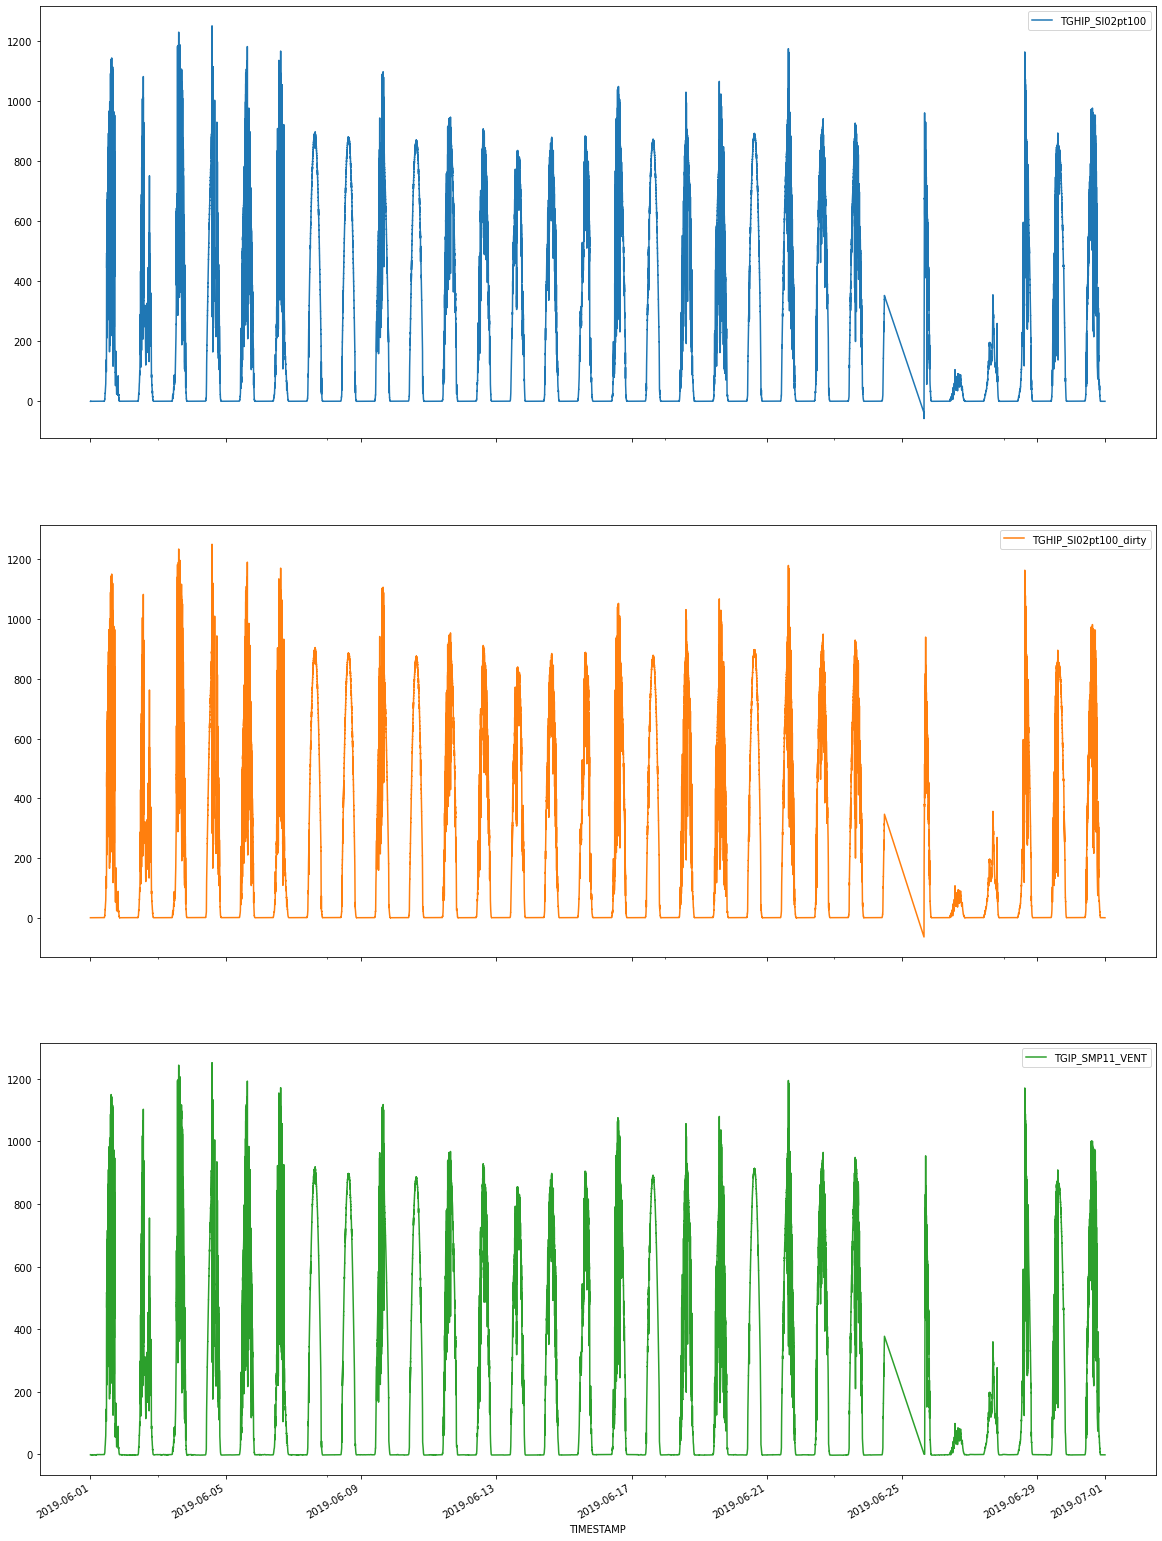

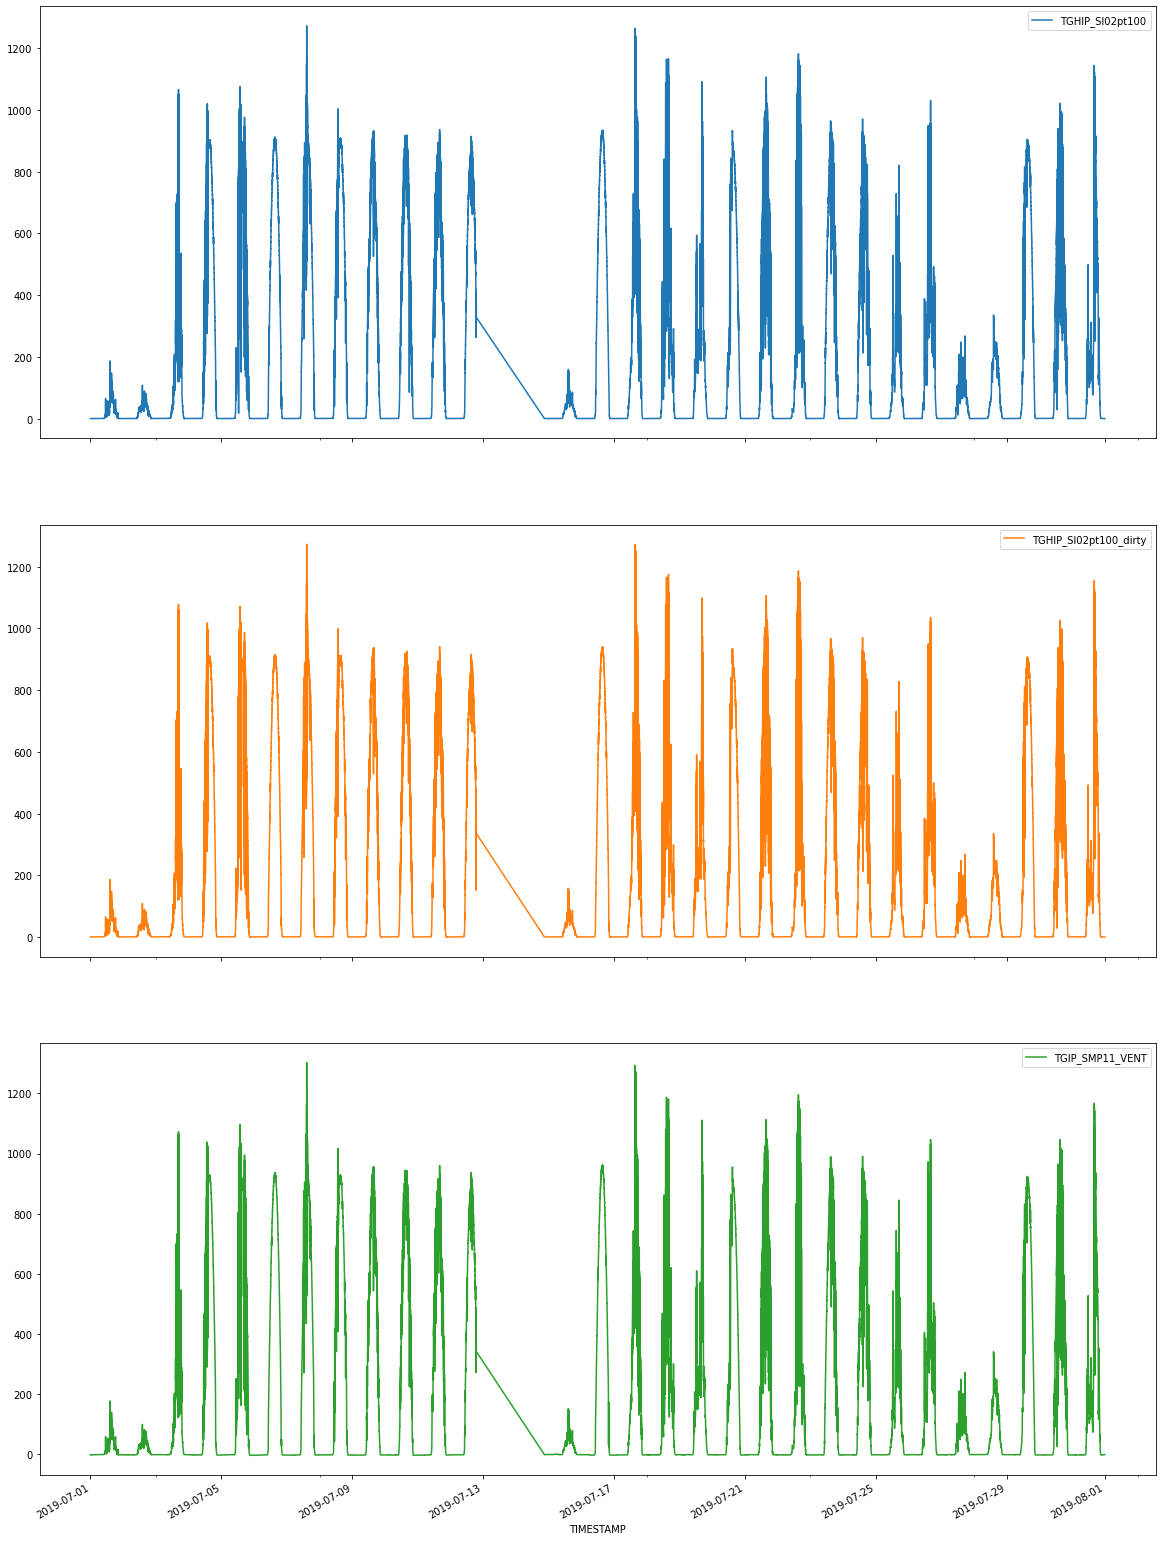

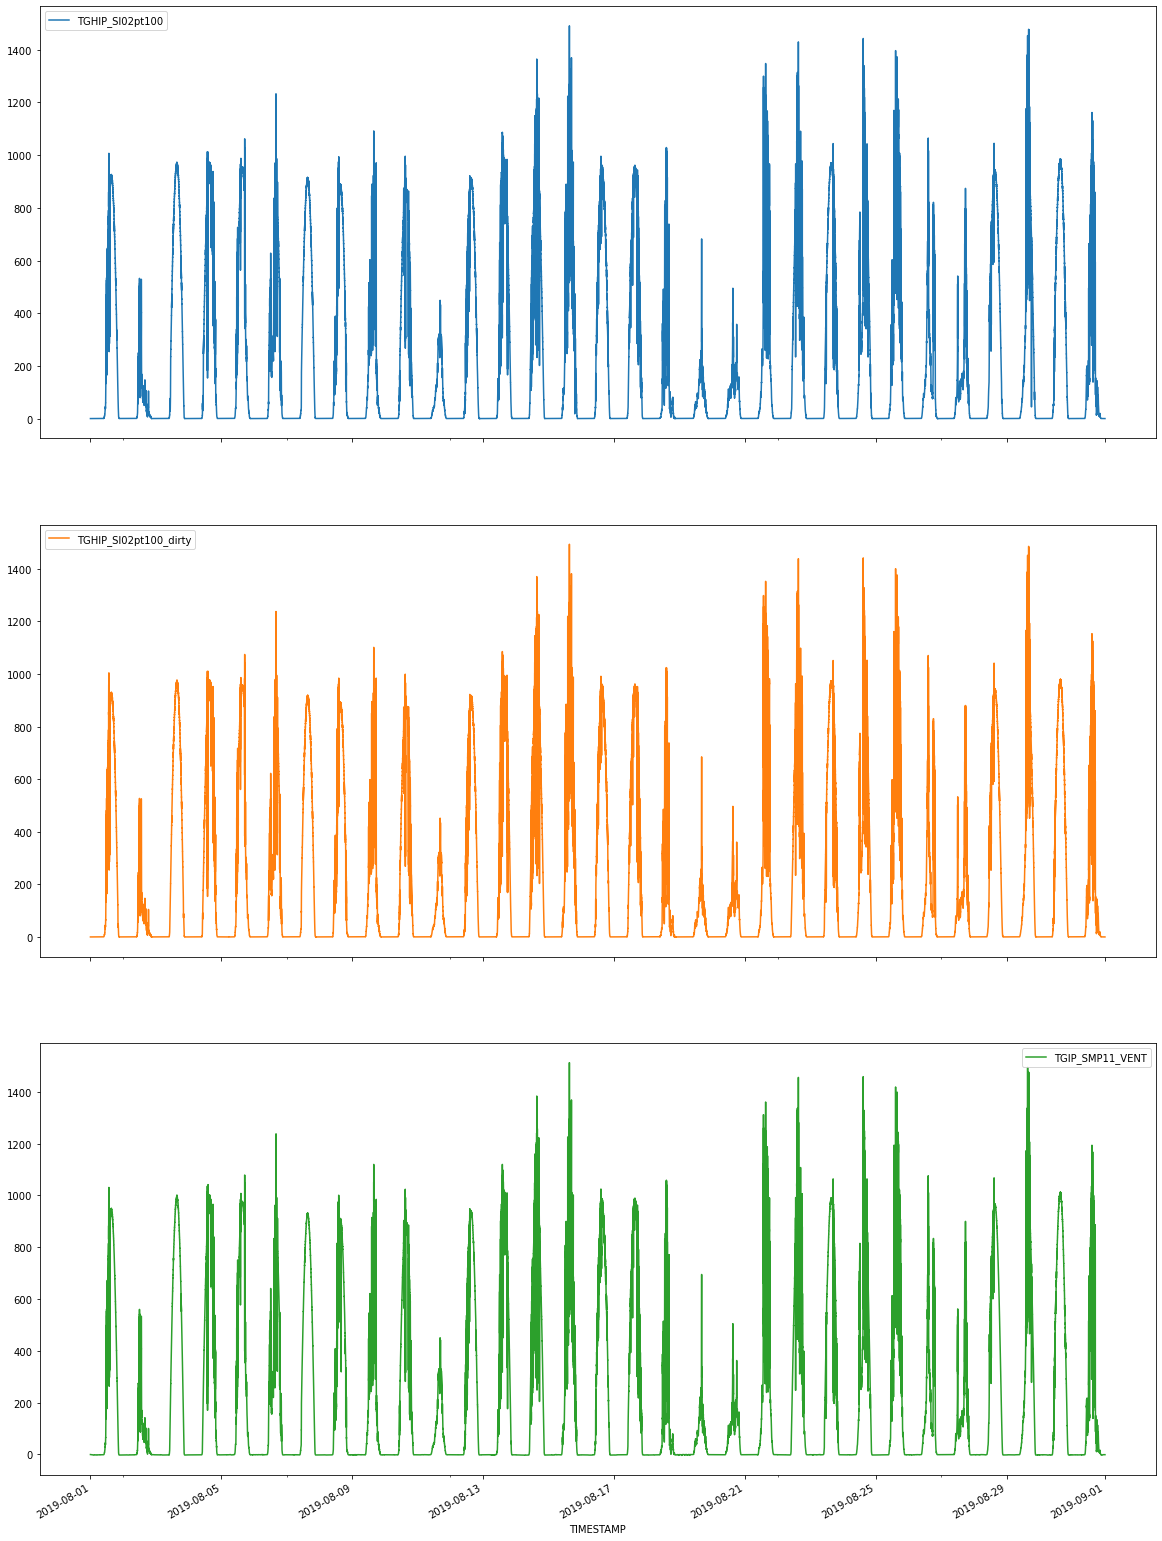

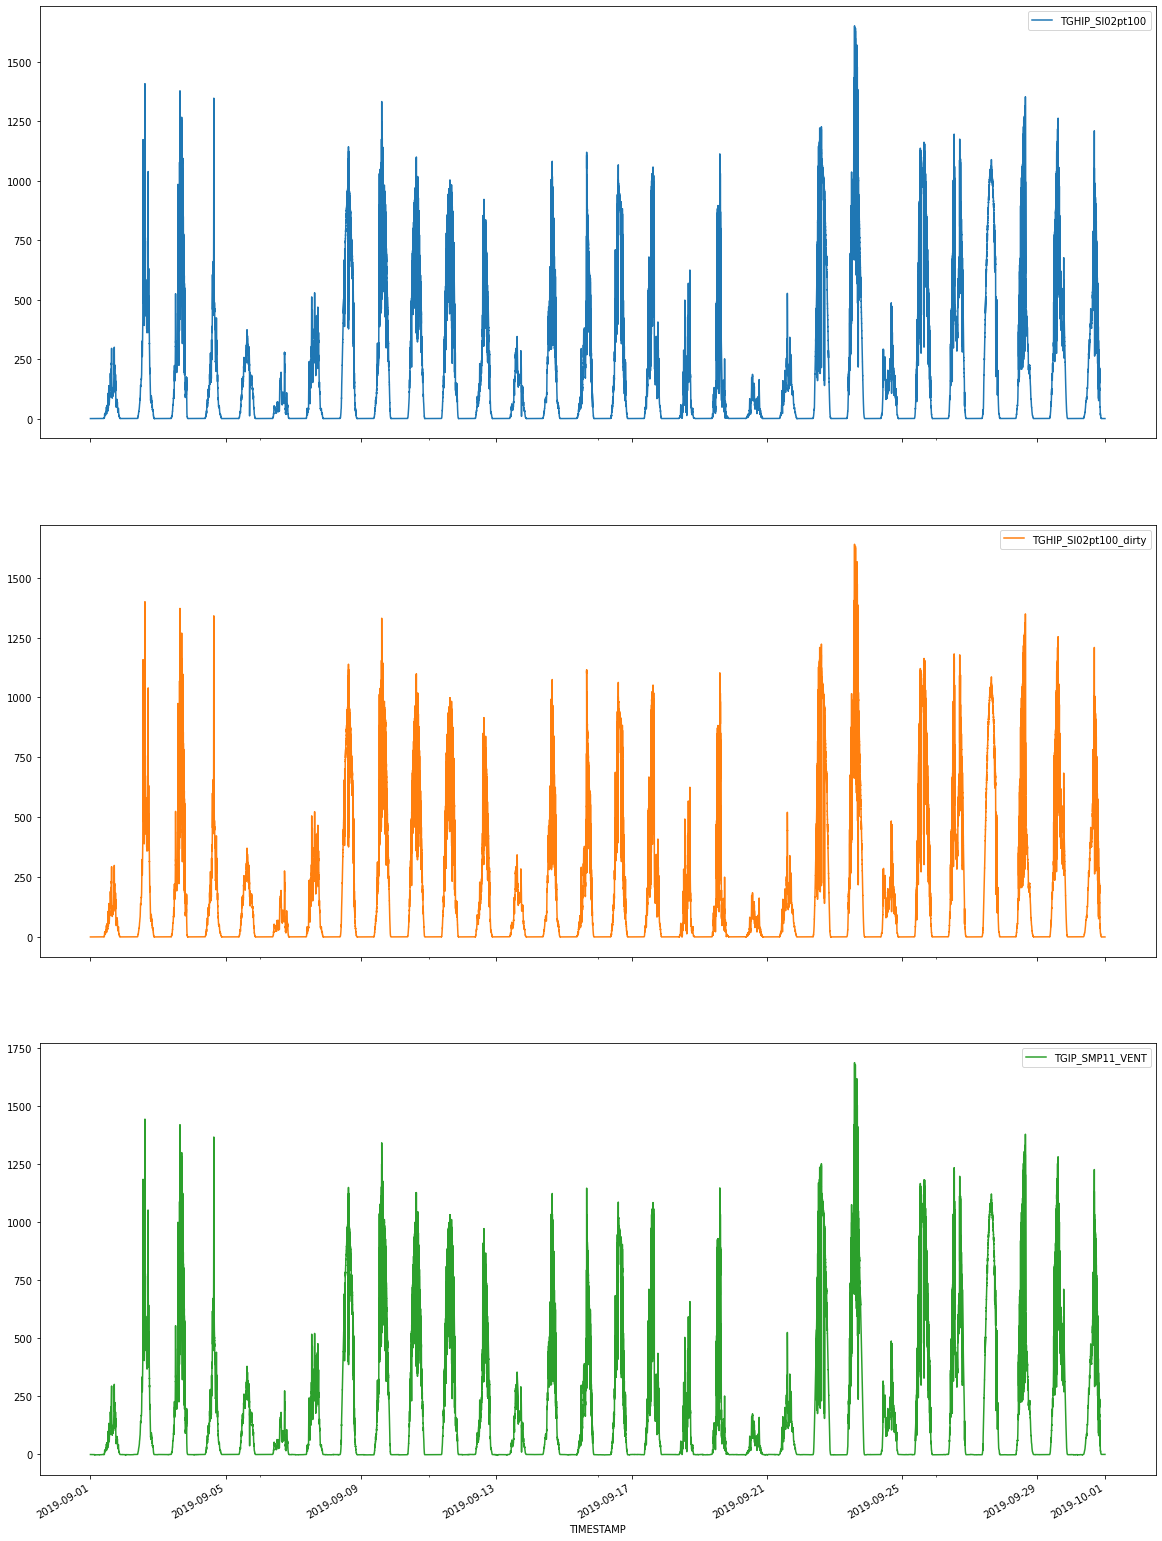

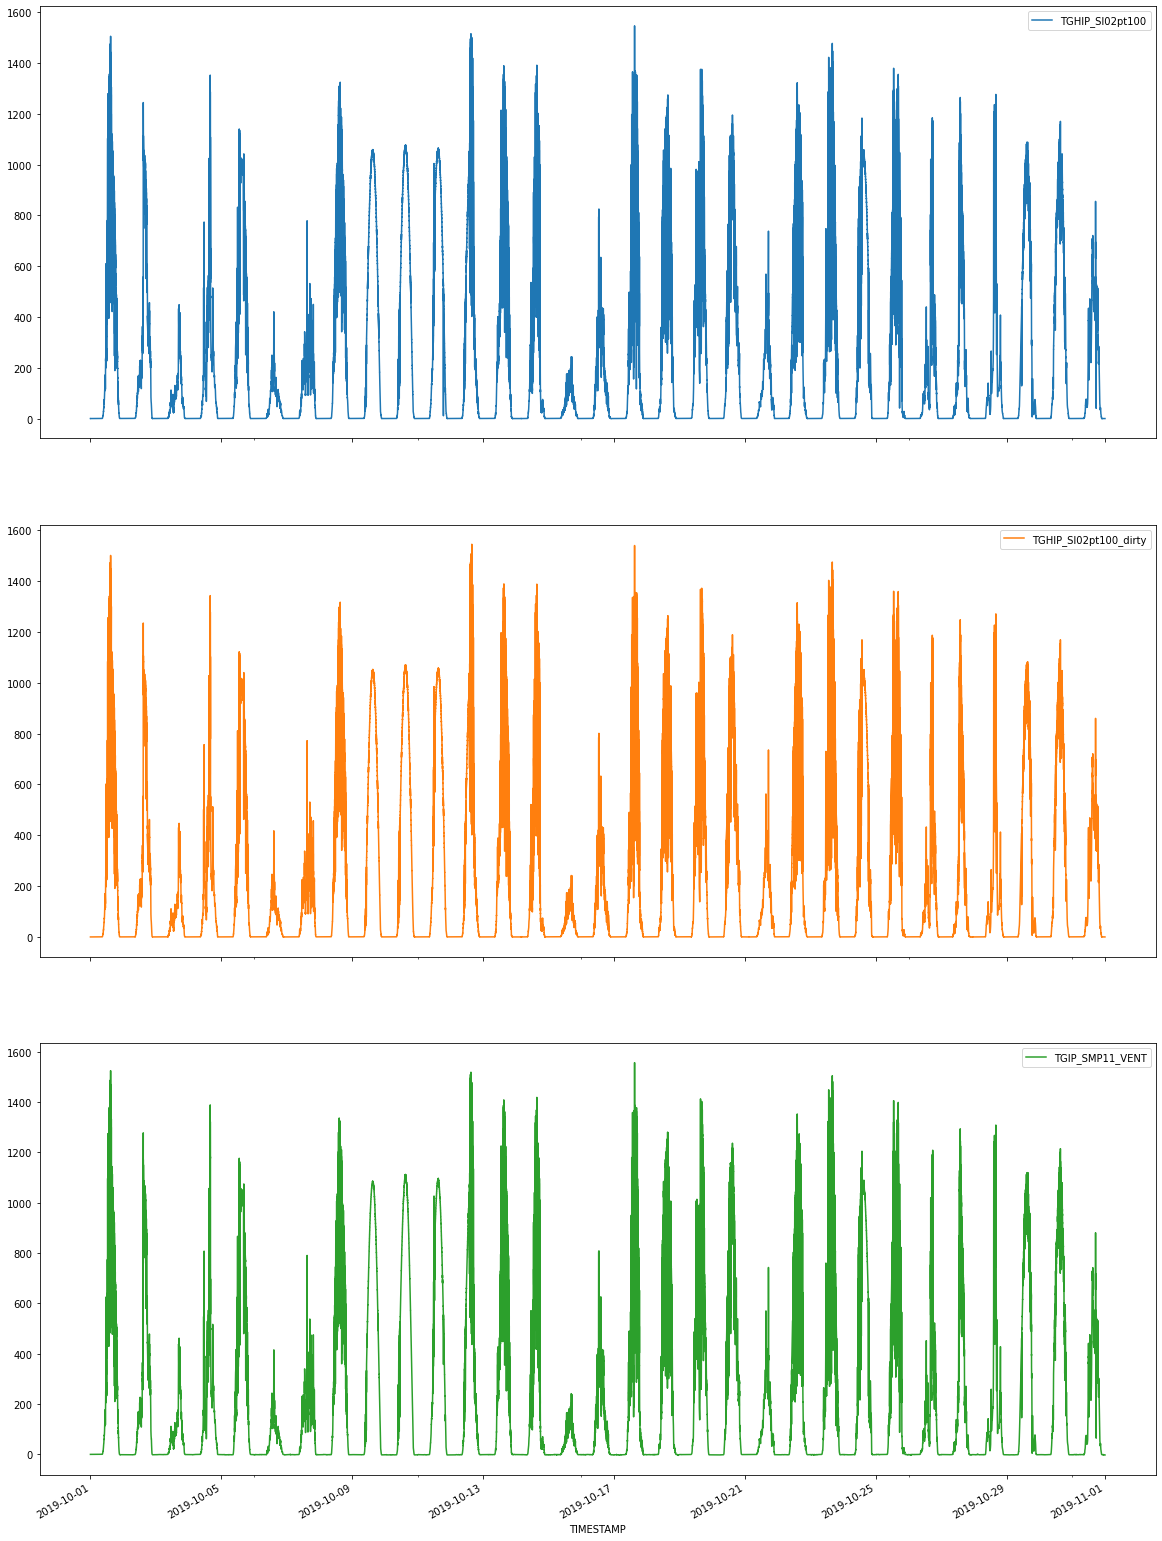

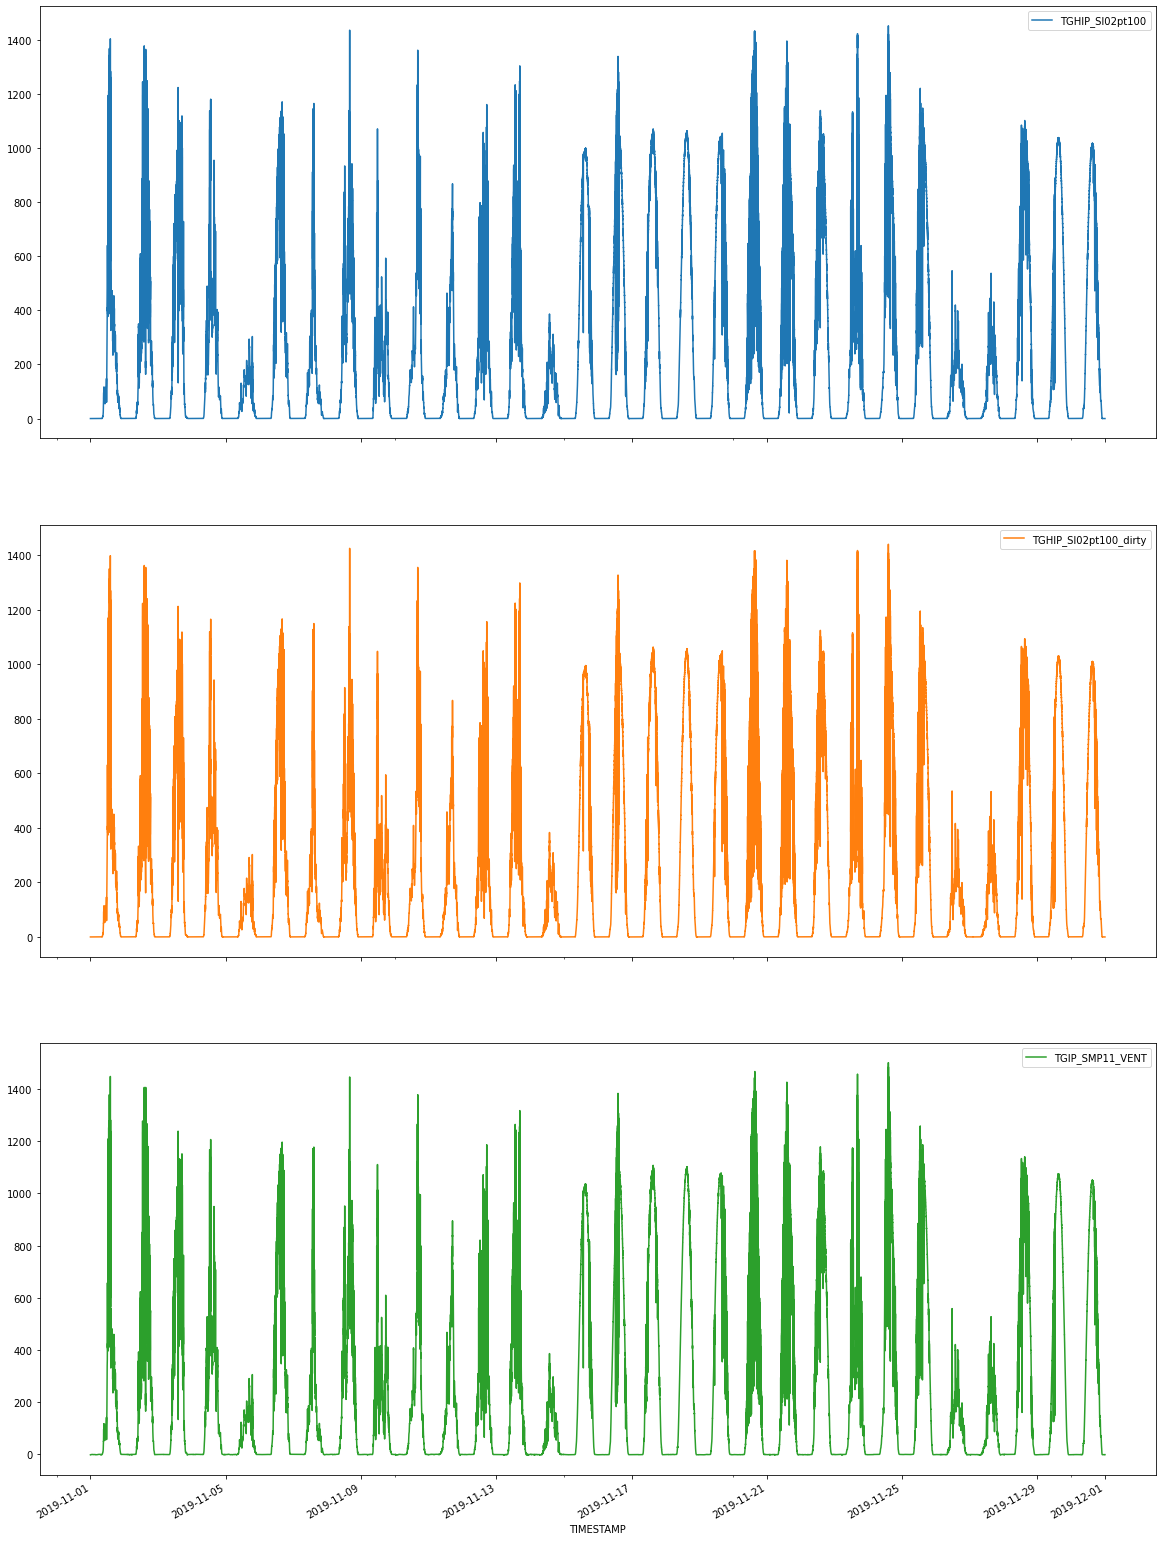

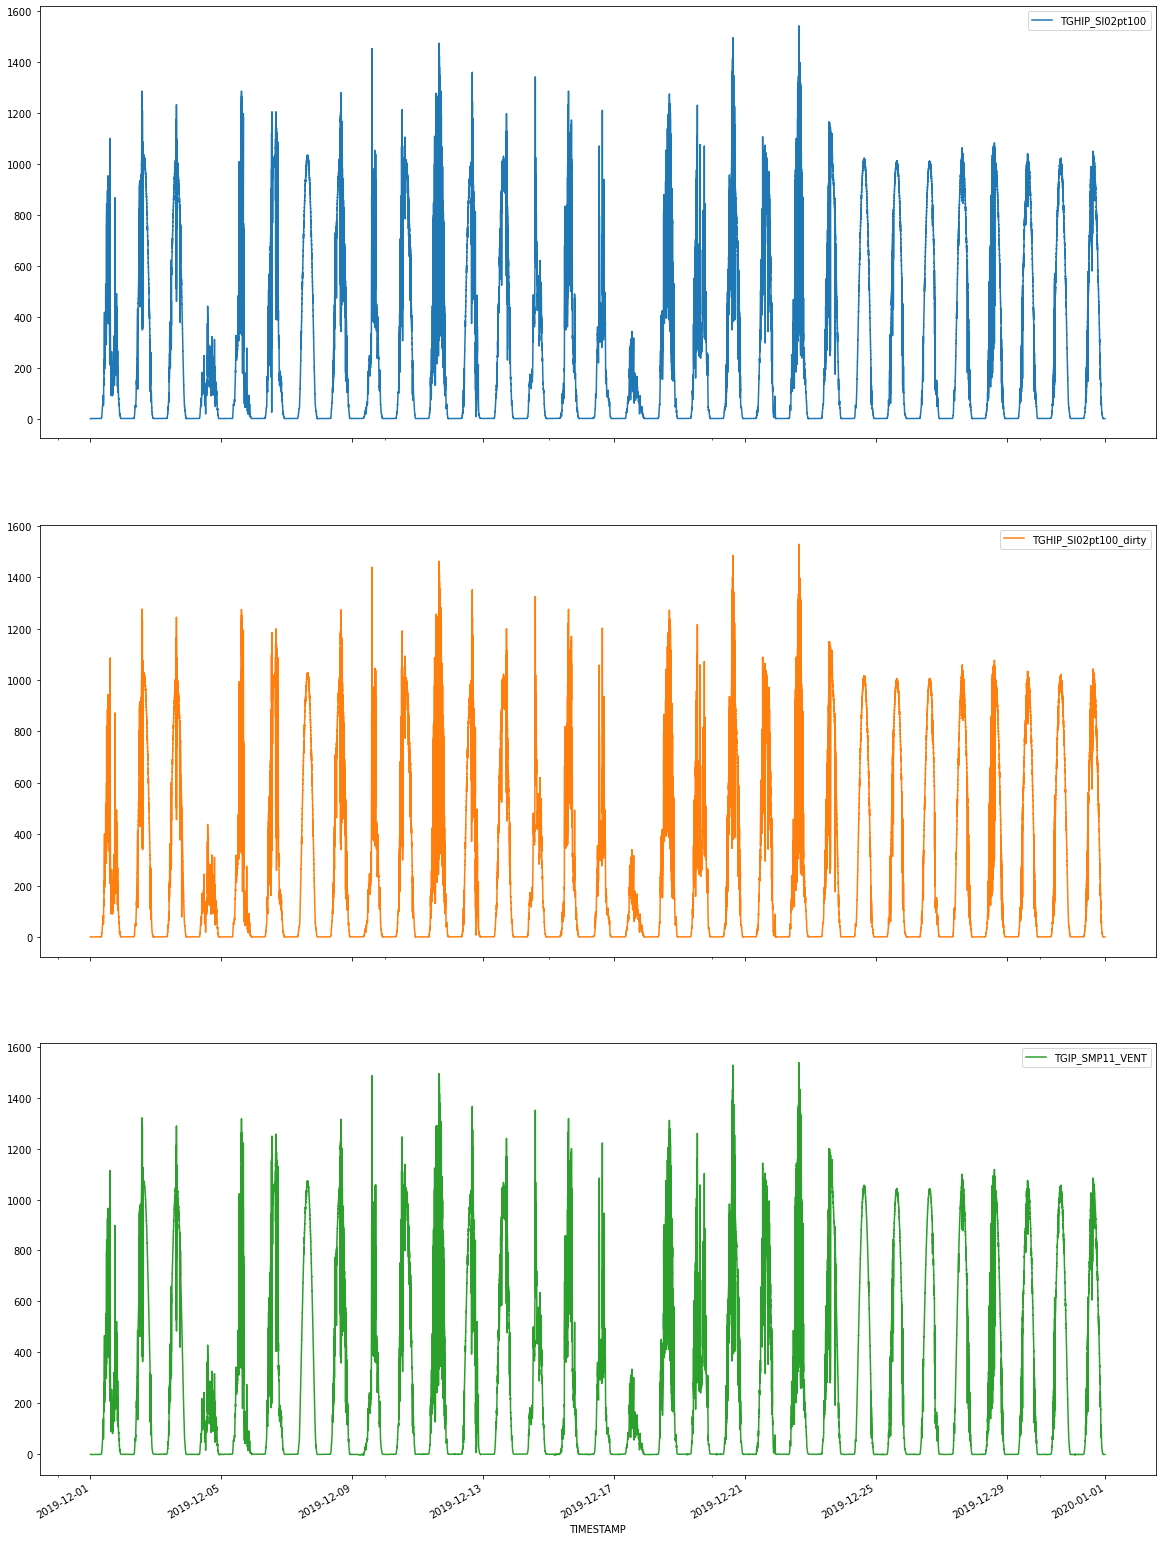

In [61]:
Months = ['2019-01','2019-02','2019-03', '2019-04','2019-05','2019-06','2019-07','2019-08', '2019-09','2019-10','2019-11','2019-12']

for month in Months:
    GTIplot = GTIdata.loc[month].plot(subplots=True, figsize=(20, 30))
    figname = 'GTI '+ month+'.jpeg'
    fig = GTIplot[0].get_figure()
    fig.savefig(figname)


In [35]:
month

'2019-12'

In [37]:
    figname = 'GTI '+ month


In [39]:
figname

'GTI 2019-12'

In [62]:
GTIdata

,TGHIP_SI02pt100,TGHIP_SI02pt100_dirty,TGIP_SMP11_VENT
TIMESTAMP,,,
2019-01-02 22:58:59,0.0,0.00,-1.7
2019-01-02 22:59:00,0.0,0.00,-1.7
2019-01-02 22:59:01,0.0,0.00,-1.7
2019-01-02 22:59:02,0.0,0.00,-1.7
2019-01-02 22:59:03,0.0,0.00,-1.7
...,...,...,...
2019-12-31 23:47:00,0.0,0.00,-2.4
2019-12-31 23:47:01,0.0,0.00,-2.4
2019-12-31 23:47:02,0.0,0.00,-2.4
